In [5]:
import requests
from pathlib import Path
import requests
from bs4 import BeautifulSoup

# The base URL for the downloads (you need to replace this with the actual base URL)
base_url = 'https://lhncbc.nlm.nih.gov/ii/information/MBR/Baselines/2023/'

# List of all file names (you need to fill this with the actual file names from the screenshot)
# Generating a list of file names based on the given pattern

# Define the base of the file names
base_name = "pubmed23n"

# Use a list comprehension to generate the full list of file names
file_names = [f"{base_name}{str(i).zfill(4)}.xml.gz" for i in range(1, 1167)]

# file_names[:10]  # Display the first 10 file names to check if they are correct


# Directory where you want to save the downloaded files
download_dir = '/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/annual_zips/'
Path(download_dir).mkdir(exist_ok=True)

print('All files have been downloaded.')


All files have been downloaded.


In [9]:
import sys
from pathlib import Path

# Get the absolute path of the current notebook (a.ipynb)
notebook_path = Path().resolve()

# Go up two levels to the 'ragged' directory
ragged_path = notebook_path.parent.parent

# Add the 'ragged' directory to sys.path
if str(ragged_path) not in sys.path:
    sys.path.append(str(ragged_path))

# Now you can import file_utils
from file_utils import save_jsonl


In [10]:
ragged_path

PosixPath('/home/jhsia2/ragged')

In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the page you want to scrape
url = 'https://lhncbc.nlm.nih.gov/ii/information/MBR/Baselines/2023.html'

# Perform an HTTP GET request to the page
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all 'a' tags with 'href' attribute
    a_tags = soup.find_all('a', href=True)

    # Extract the URLs from the 'href' attribute
    urls = [tag['href'] for tag in a_tags if '.xml.gz' in tag['href']]


In [6]:
for i, url in enumerate(urls):
    file_name = file_names[i]
    local_filename = Path(download_dir) / file_name
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)

In [26]:
from xml.etree import ElementTree as ET

# The XML content as a string - for demonstration purposes this will be a truncated version of the XML you provided



# Initialize an empty list to hold the extracted information
# articles_info = {}
articles_info = []
id2title = {}

for file_name in file_names:
    file_name = file_name.split('.gz')[0]
    print(file_name)
    file_path = f'/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/annual_zips/{file_name}'

    # Now let's parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Iterate over all articles in the XML
    articles = root.findall('.//PubmedArticle')
    num_articles = len(articles)
    for i, article in enumerate(articles):
        # if (i ==3):
        #     break
        if (i%1000 == 0):
            print(i)
        # # Find and store the PMID
        id = article.findtext('.//PMID')
        
        # # Find and store the Article Title
        title = article.findtext('.//ArticleTitle')
        
        # # Find and store the Abstract Text
        # # Note: This will only get the first AbstractText if there are multiple.
        abstract = article.findtext('.//AbstractText')
        # print(id, title, abstract)
        if title != None and title != '':
            articles_info.append({'id': f'{id}_0', 'content': title.strip()})
            id2title[id] = title.strip()
        if abstract != None and abstract != '':
            articles_info.append({'id': f'{id}_1', 'content': abstract.strip()})
            break
    break


pubmed23n0001.xml
0
1 Formate assay in body fluids: application in methanol poisoning. None
2 Delineation of the intimate details of the backbone conformation of pyridine nucleotide coenzymes in aqueous solution. None
4 Effect of chloroquine on cultured fibroblasts: release of lysosomal hydrolases and inhibition of their uptake. None
3 Metal substitutions incarbonic anhydrase: a halide ion probe study. None
5 Atomic models for the polypeptide backbones of myohemerythrin and hemerythrin. None
6 Studies of oxygen binding energy to hemoglobin molecule. None
7 Maturation of the adrenal medulla--IV. Effects of morphine. None
8 Comparison between procaine and isocarboxazid metabolism in vitro by a liver microsomal amidase-esterase. None
9 Radiochemical assay of glutathione S-epoxide transferase and its enhancement by phenobarbital in rat liver in vivo. None
10 Digitoxin metabolism by rat liver microsomes. None
11 Identification of adenylate cyclase-coupled beta-adrenergic receptors with radi

In [ ]:
save_json(id2title, '/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/id2title.json')

In [22]:
save_jsonl(articles_info, '/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/complete_medline_corpus.jsonl')

In [1]:
import sys
sys.path.append('/home/jhsia2/ragged')
import numpy as np
import os
from file_utils import load_json
loaded= load_json('/data/tir/projects/tir6/general/afreens/dbqa/data/gold_zeno_files/gold_bioasq_zeno_file.json')

answer_len = []
answers = []
for l in loaded:
    for a in l['output']['answer_set']:
        answer_len.append(len(a.split()))
        answers.append(a)
    import matplotlib.pyplot as plt
def get_hist_info(size_set):
    print('avg', np.mean(size_set), 'std', np.std(size_set), 'min', np.min(size_set), 'max', np.max(size_set))

    plt.hist(size_set, bins=np.arange(min(size_set)-0.5, max(size_set)+1.5, 1), edgecolor='black')

    # Set the labels and title for the plot
    # plt.xlabel(f'gold {unit} set size')
    # plt.ylabel('frequency')
    # plt.title(f'gold {unit} set size - {dataset}')

    # Set x-ticks to correspond to the integer values
    plt.xticks(range(min(size_set), max(size_set) + 1))

    # Display the plot
    plt.show()

reading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_zeno_files/gold_bioasq_zeno_file.json


In [2]:
from collections import Counter
c = Counter(answer_len)

In [3]:
np.mean(answer_len)

2.1399345335515547

In [6]:
c

Counter({1: 5151,
         2: 1540,
         3: 784,
         4: 343,
         5: 220,
         6: 137,
         7: 88,
         8: 59,
         9: 40,
         10: 34,
         11: 23,
         13: 20,
         12: 18,
         15: 15,
         17: 13,
         19: 10,
         21: 10,
         18: 8,
         16: 8,
         14: 7,
         26: 4,
         23: 3,
         24: 3,
         28: 2,
         27: 2,
         22: 2,
         25: 2,
         32: 2,
         30: 2,
         20: 1,
         38: 1,
         29: 1,
         35: 1})

avg 2.1399345335515547 std 2.6214591305737547 min 1 max 38


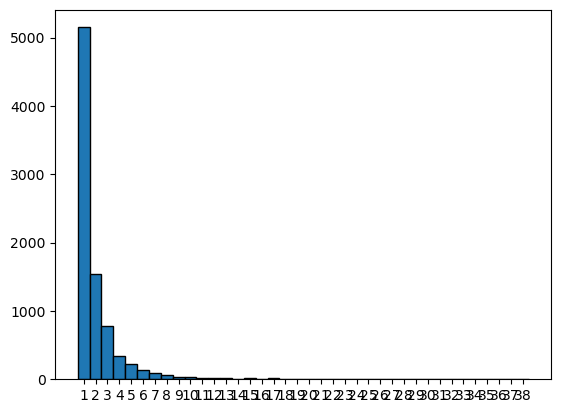

In [3]:
get_hist_info(answer_len)

In [ ]:
# import pickle
# with open('/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/annual_corpus_dict.pkl', 'wb') as f:
#     pickle.dump(articles_info)